\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

plt.style.use('maroon.mplstyle')

s, t = sp.symbols('s t')

display_latex = lambda text: display(Latex(text))

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 6 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 9.11 Part A
## Given
$T(s)=\frac{Y(s)}{F(s)}=\frac{5}{(5s+1)(2s+1)}$ \
$f(t)=10\sin(0.2t)$

## Find
The steady state response $y_{ss}(t)$

## Solution
$y_{ss}(t)=|T(j\omega)|A\sin(\omega t+\angle T(j\omega))$

In [2]:
T_s = 5/((5*s + 1)*(2*s + 1))
T_s

5/((2*s + 1)*(5*s + 1))

In [3]:
T_jw = T_s.subs(s, sp.I*0.2)
T_jw

2.1551724137931*(1 - 1.0*I)*(1 - 0.4*I)

In [4]:
M = sp.Abs(T_jw)
phi = sp.arg(T_jw)

M.n()  # Magnitude

3.28266082149306

In [5]:
phi  # The angle

-1.16590454050981

In [6]:
y_ss = 10*M*sp.sin(0.2*t + phi)
y_ss

32.8266082149306*sin(0.2*t - 1.16590454050981)

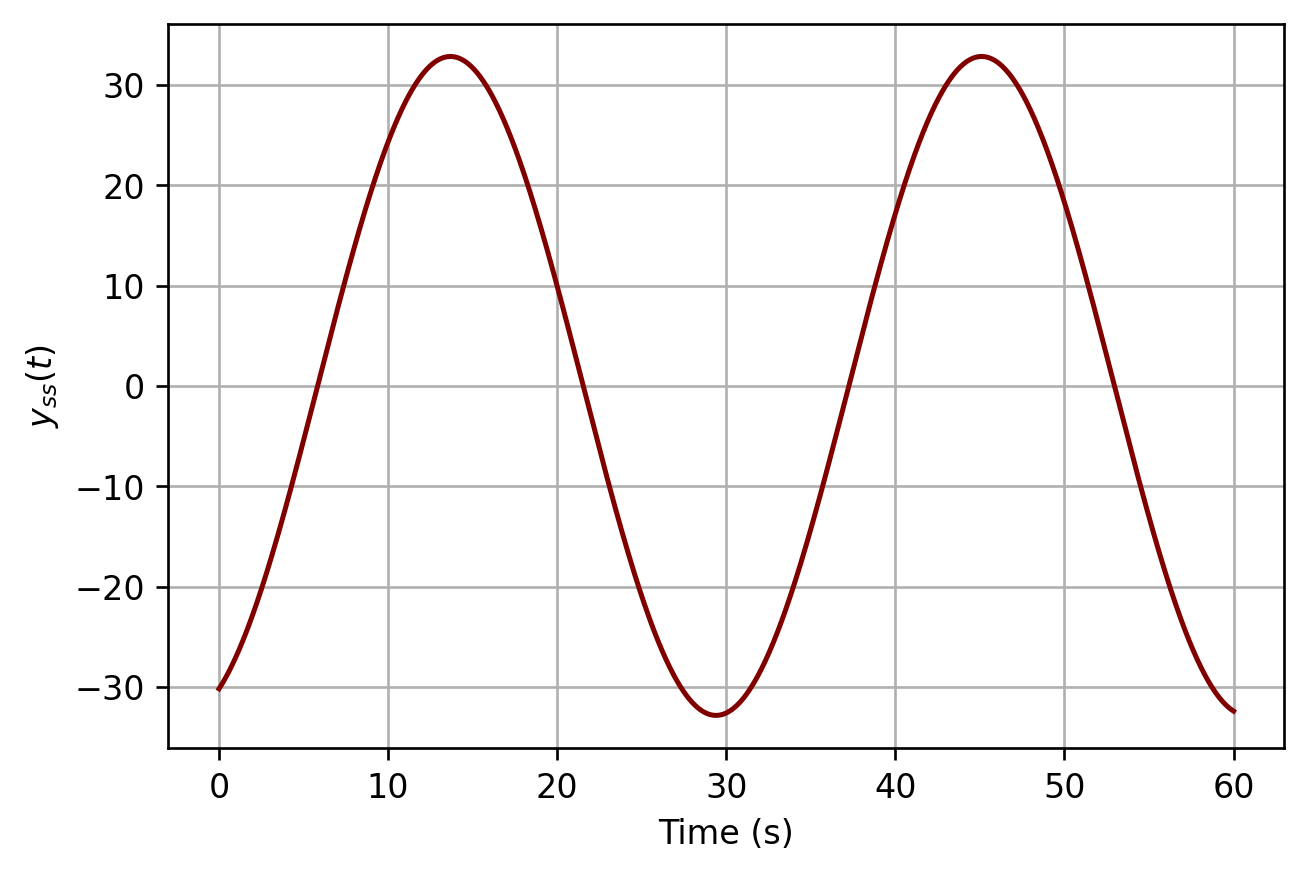

In [7]:
# Plotting it
y_ss_lamb = sp.lambdify(t, y_ss)
time = np.linspace(0, 60, 1000)

plt.plot(time, y_ss_lamb(time))
plt.xlabel('Time (s)')
plt.ylabel('$y_{ss}(t)$')
plt.show()

### Frequency Response

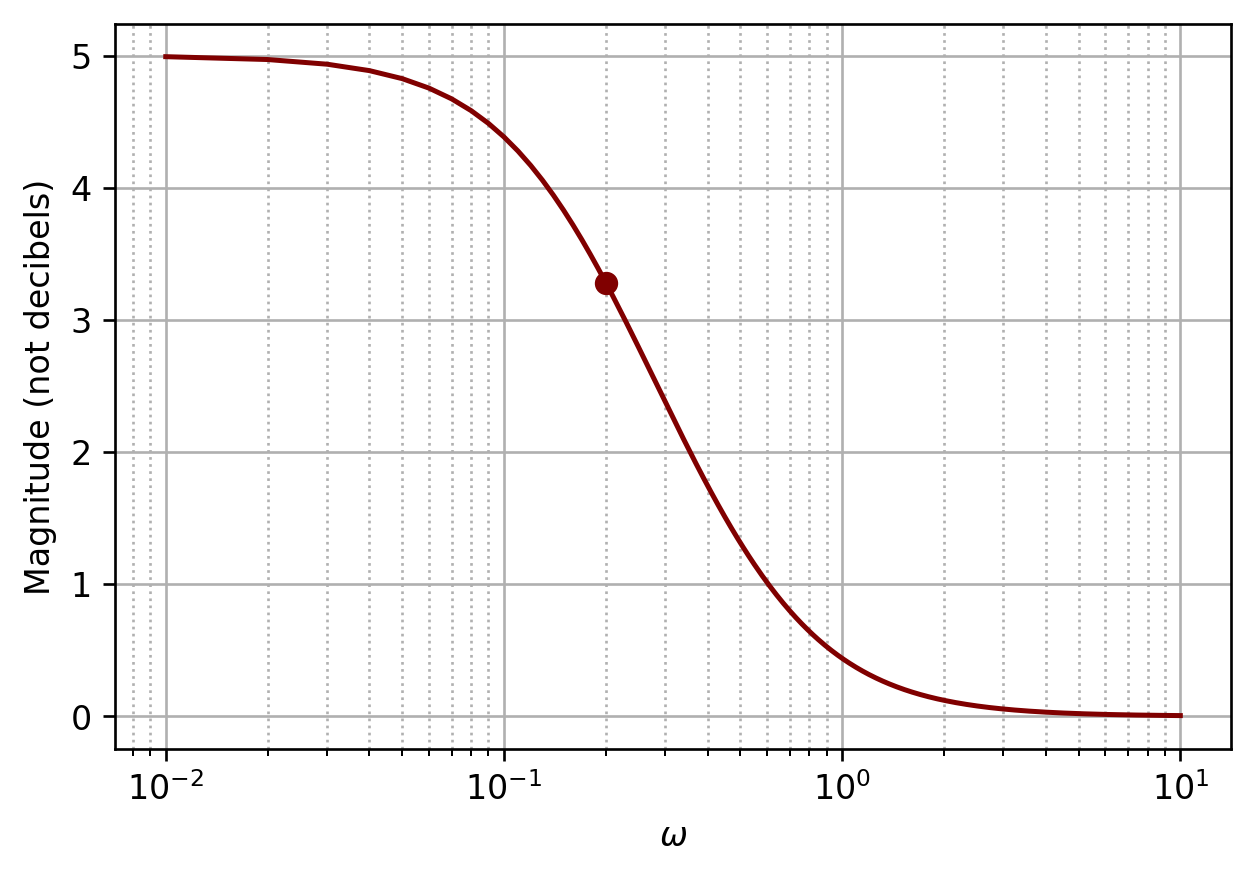

In [8]:
# Getting a plot of the magnitude response
omega_ = np.linspace(0.01, 10, 1000)
c_nums = 5/((5*1j*omega_ + 1)*(2*1j*omega_ + 1))

M = np.abs(c_nums)
plt.xscale('log')
plt.plot(omega_, M)
plt.scatter(0.2, 3.283, zorder=2)
plt.xlabel(r'$\omega$')
plt.ylabel('Magnitude (not decibels)')
plt.grid(which='minor', ls=':')
plt.show()

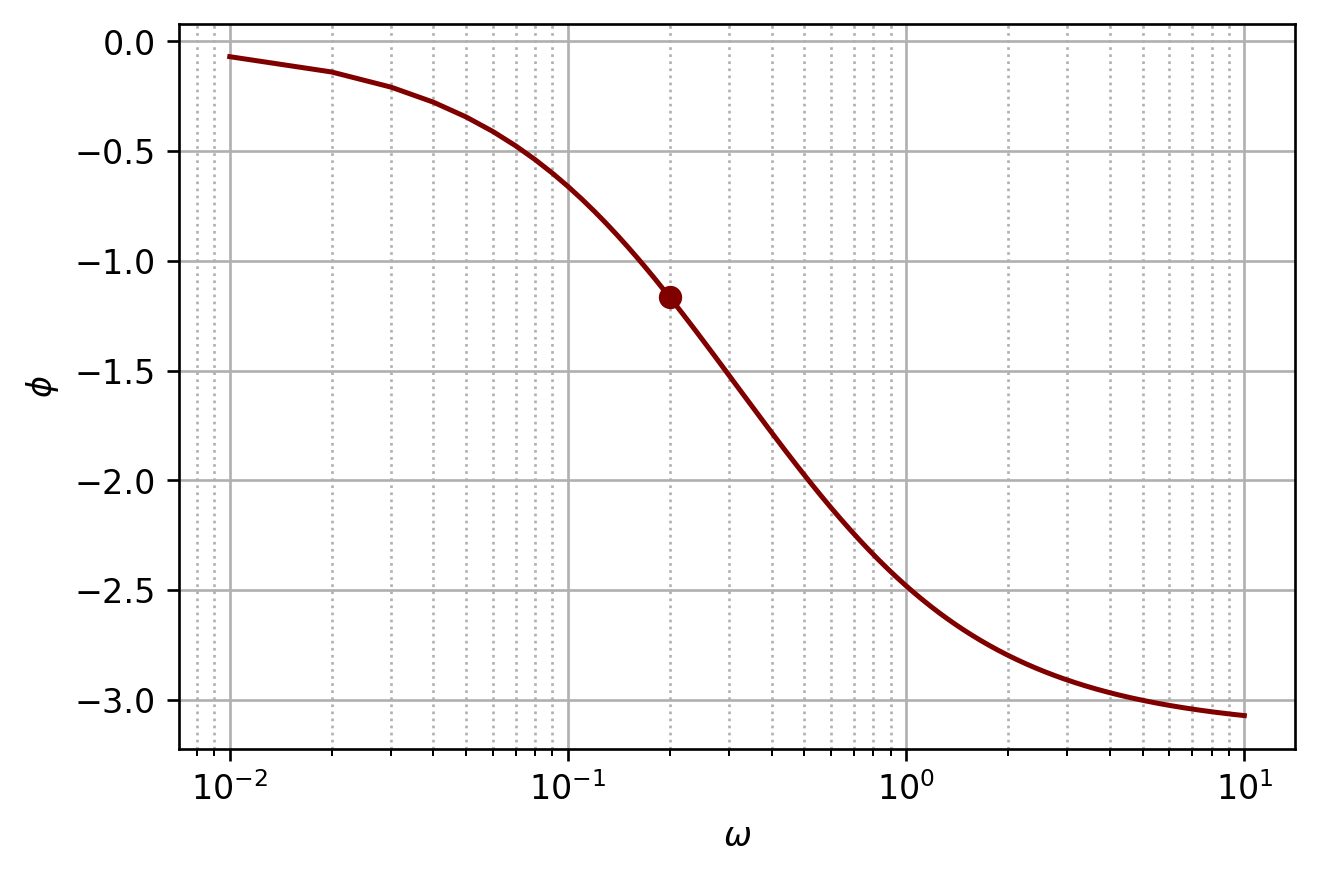

In [9]:
# Getting a plot of the phase response
phi = np.angle(c_nums)
plt.xscale('log')
plt.plot(omega_, phi)
plt.scatter(0.2, -1.166, zorder=2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\phi$')
plt.grid(which='minor', ls=':')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 6 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 9.11 Part B
## Given
$T(s)=\frac{Y(s)}{F(s)}=\frac{1}{s^2+10s+100}$ \
$f(t)=16\sin(5t)$

## Find
The steady state response $y_{ss}(t)$

## Solution
$y_{ss}(t)=|T(j\omega)|A\sin(\omega t+\angle T(j\omega))$

In [10]:
T_s = 1/(s**2 + 10*s + 100)
T_s

1/(s**2 + 10*s + 100)

In [11]:
T_jw = T_s.subs(s, sp.I*5)
T_jw

(75 - 50*I)/8125

In [12]:
M = sp.Abs(T_jw)
phi = sp.arg(T_jw)

M.n()  # The magnitude

0.0110940039245046

In [13]:
phi.n()  # The angle

-0.588002603547568

In [14]:
y_ss = 16*M.n()*sp.sin(5*t + phi.n())
y_ss

0.177504062792073*sin(5*t - 0.588002603547568)

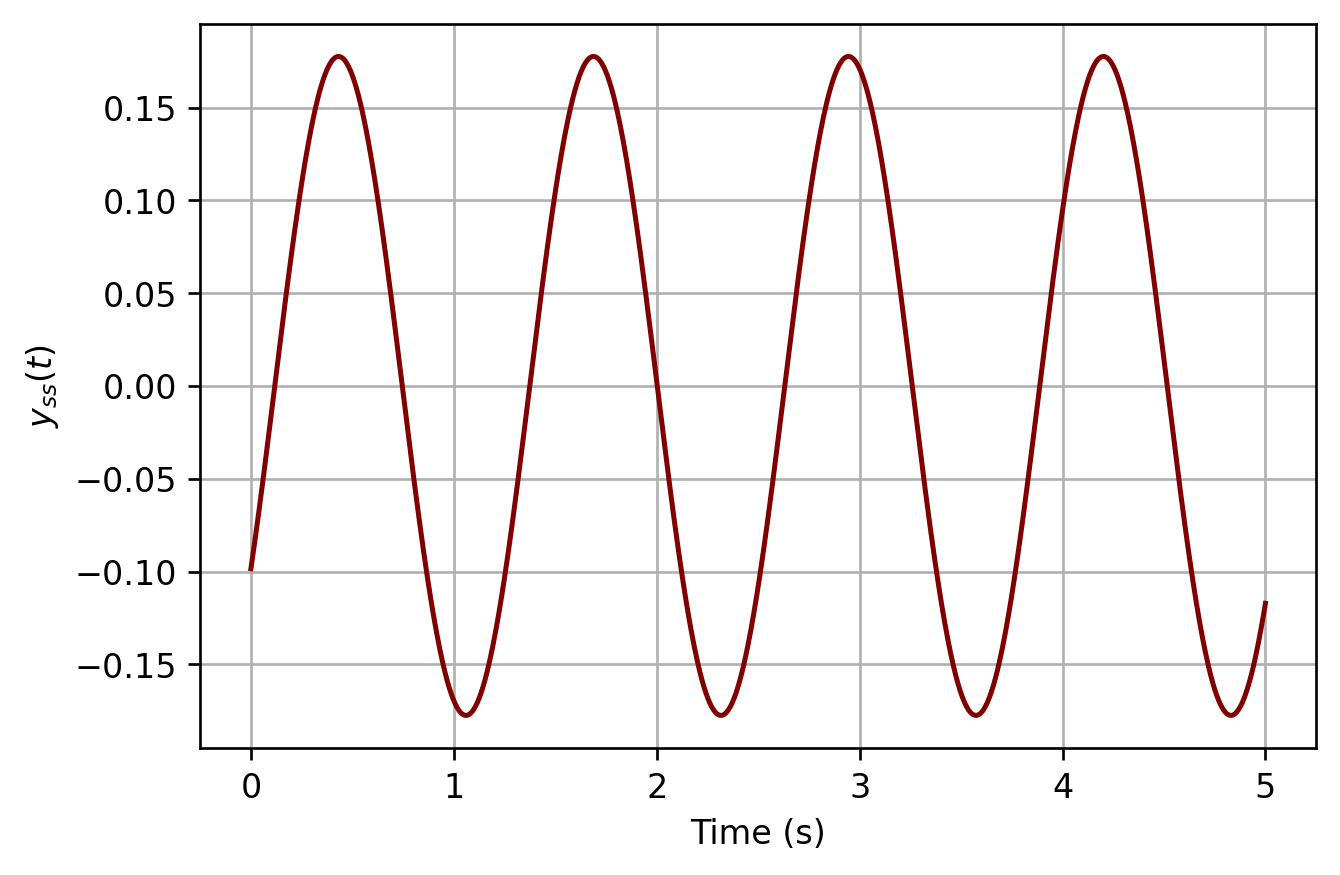

In [15]:
y_ss_lamb = sp.lambdify(t, y_ss)
time = np.linspace(0, 5, 1000)

plt.plot(time, y_ss_lamb(time))
plt.xlabel('Time (s)')
plt.ylabel('$y_{ss}(t)$')
plt.show()

### Frequency Response

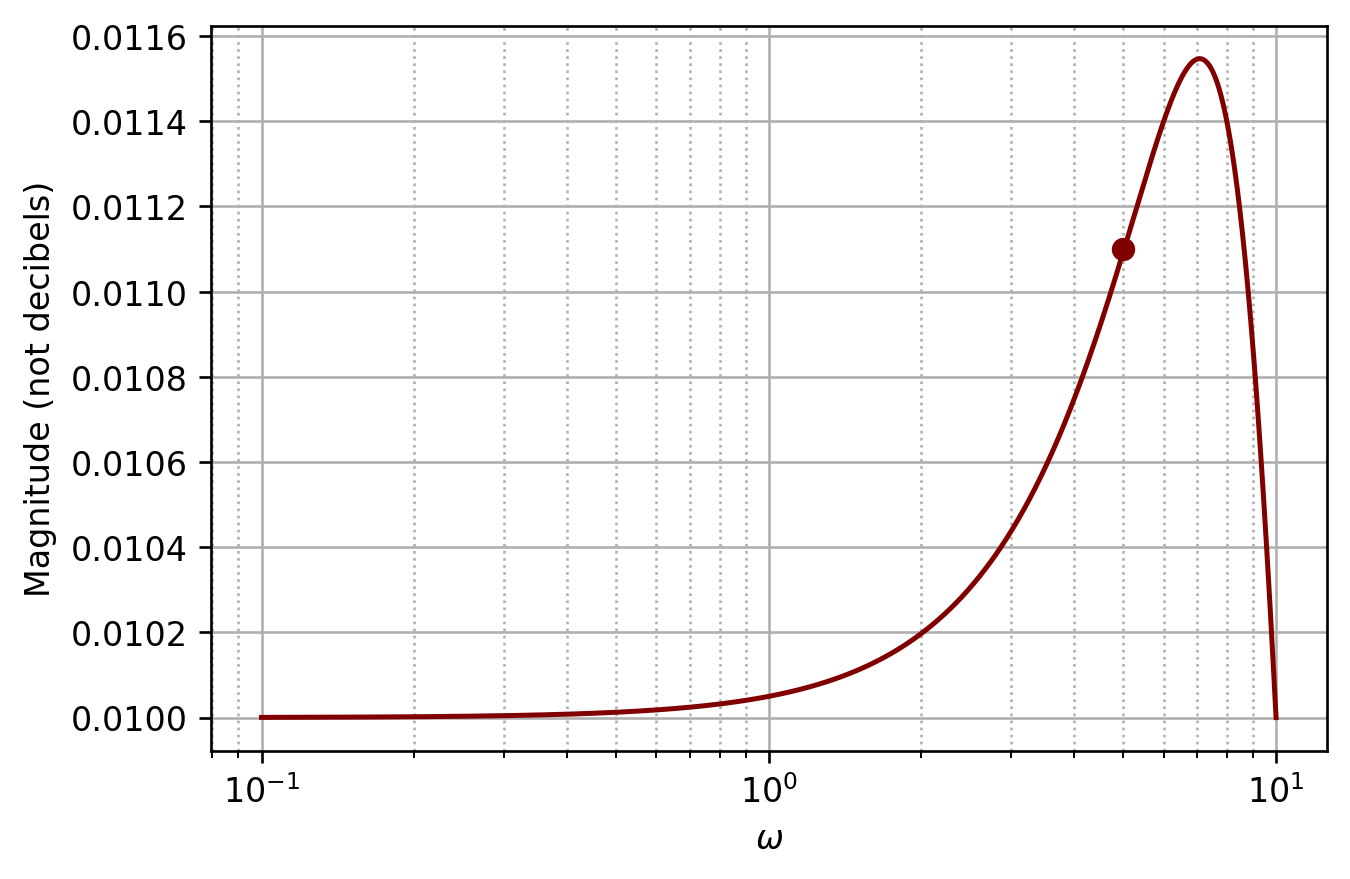

In [16]:
# Plotting the magnitude response
omega_ = np.linspace(0.1, 10, 1000)
c_nums = 1/((1j*omega_)**2 + 10*1j*omega_ + 100)

plt.xscale('log')
plt.plot(omega_, np.abs(c_nums))
plt.scatter(5, 0.0111, zorder=2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'Magnitude (not decibels)')
plt.grid(which='minor', ls=':')
plt.show()

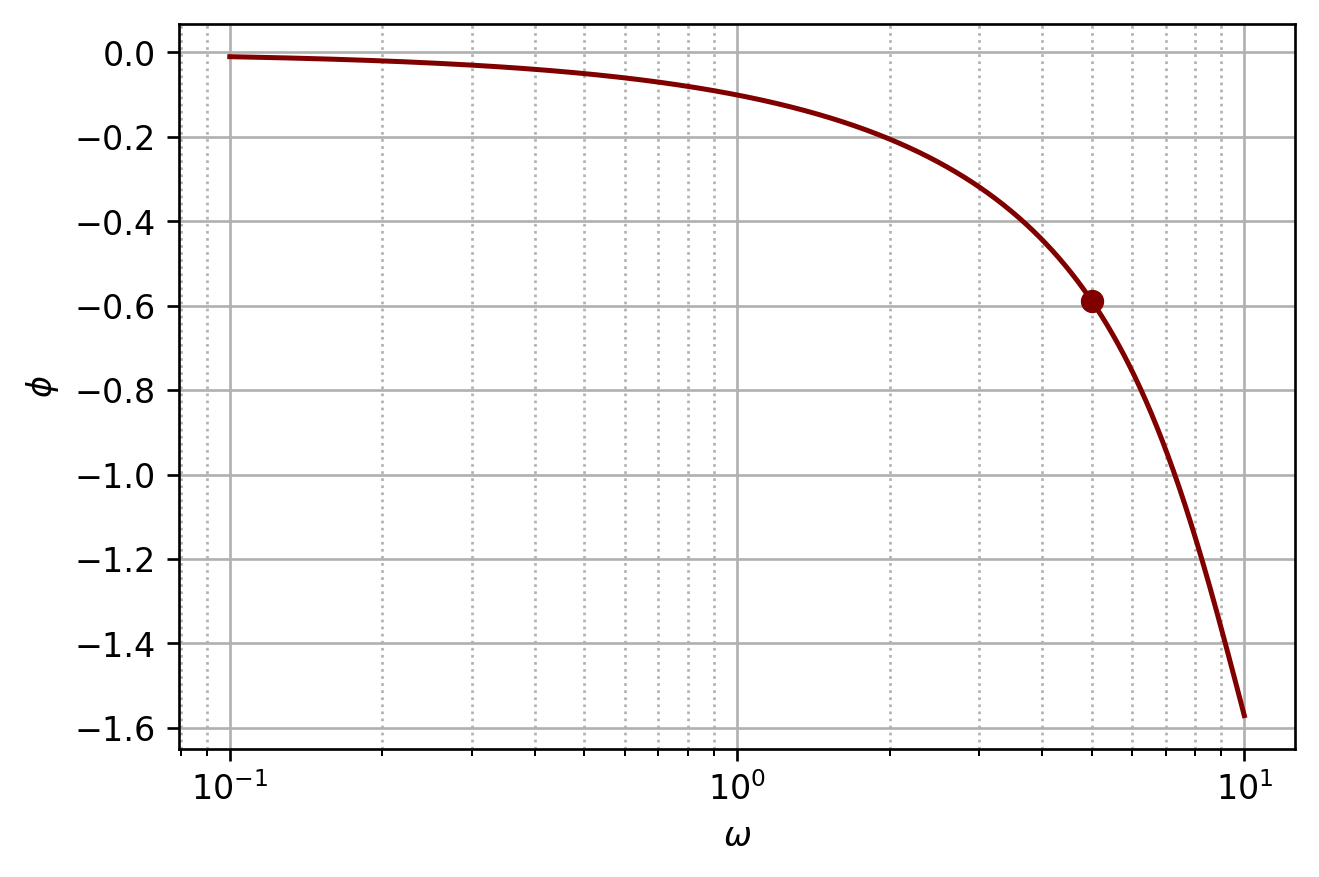

In [17]:
# Plotting the phase response
plt.xscale('log')
plt.plot(omega_, np.angle(c_nums))
plt.scatter(5, -0.588, zorder=2)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\phi$')
plt.grid(which='minor', ls=':')
plt.show()